In [1]:
from keras import models
from keras import layers
from keras import optimizers, losses, metrics
from keras import preprocessing
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


<br>
<br>

# 데이터 로드

In [2]:
# 단어의 최대 개수
max_words = 10000

# 한 문장에서 단어 시퀀스의 최대 개수
max_sequences = 500

# 임베딩 벡터 차원
embedding_dim = 100

# IMDb 리뷰 데이터를 최대 단어 10000개로 제한하여 가져옴
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_words)

In [3]:
# 훈련셋 크기
train_data.shape


(25000,)

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
# 훈련셋 라벨 크기
train_labels.shape


(25000,)

In [6]:
# 테스트셋 크기
test_data.shape


(25000,)

In [7]:
# 테스트셋 라벨 크기
test_labels.shape


(25000,)

In [8]:
# 첫 번째 훈련셋 출력
# 각 단어가 0~9999 사이의 인덱스 숫자로 변환되어 있음
train_data[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
# 첫 번째 훈련셋 라벨 출력
# 부정 -> 0, 긍정 -> 1
train_labels[0]


1

In [10]:
# 훈련셋의 최대 인덱스
max([max(seq) for seq in train_data])


9999

In [11]:
# 훈련셋의 최소 인덱스
min([min(seq) for seq in train_data])


1

문서의 인덱스에서 0은 '패딩', 1은 '문서 시작', 2는 '사전에 없음'을 나타냅니다. train_data에 패딩이 없기 때문에 최소 인덱스가 1로 표시되었습니다.

<br>
<br>

# 인덱스로 된 문장을 단어로 확인

In [12]:
# 각 단어와 인덱스가 매핑된 딕셔너리
word_index = imdb.get_word_index()

In [13]:
# 빈도수에 따라 정렬되어 있어, 낮은 숫자가 자주 나오는 단어
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [14]:
# 인덱스와 단어로 딕셔너리를 뒤집음
word_index_reverse = dict([(value, key) for (key, value) in word_index.items()])

# train_data에서 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'
# word_index에는 위의 태그가 없기 때문에 인덱스에서 3을 빼고 검색
# 사전에 없는 단어는 ?로 표시
text = ' '.join([word_index_reverse.get(i - 3, '?') + '(' + str(i) + ')'
                 for i in train_data[0]])

In [15]:
# train_data의 첫 번째 문서 출력
text


"?(1) this(14) film(22) was(16) just(43) brilliant(530) casting(973) location(1622) scenery(1385) story(65) direction(458) everyone's(4468) really(66) suited(3941) the(4) part(173) they(36) played(256) and(5) you(25) could(100) just(43) imagine(838) being(112) there(50) robert(670) ?(2) is(9) an(35) amazing(480) actor(284) and(5) now(150) the(4) same(172) being(112) director(167) ?(2) father(336) came(385) from(39) the(4) same(172) scottish(4536) island(1111) as(17) myself(546) so(38) i(13) loved(447) the(4) fact(192) there(50) was(16) a(6) real(147) connection(2025) with(19) this(14) film(22) the(4) witty(1920) remarks(4613) throughout(469) the(4) film(22) were(71) great(87) it(12) was(16) just(43) brilliant(530) so(38) much(76) that(15) i(13) bought(1247) the(4) film(22) as(17) soon(515) as(17) it(12) was(16) released(626) for(18) ?(2) and(5) would(62) recommend(386) it(12) to(8) everyone(316) to(8) watch(106) and(5) the(4) fly(2223) fishing(5244) was(16) amazing(480) really(66) crie

제일 처음 인덱스는 문서의 시작인 '?(1)'입니다. 그리고 빈도수가 낮은 10000 인덱스 이상의 단어들은 사전에 없다는 뜻인 '?(2)'으로 표시됩니다.

<br>
<br>

# 전처리

In [16]:
# 훈련셋에 패딩 추가
x_train = preprocessing.sequence.pad_sequences(train_data,
                                               maxlen=max_sequences,
                                               padding='post')

# 테스트셋에 패딩 추가
x_test = preprocessing.sequence.pad_sequences(test_data,
                                              maxlen=max_sequences,
                                              padding='post')

pad_sequences() 함수는 maxlen 만큼 0으로 패딩을 추가합니다. 보통 텍스트를 처리할 때, 이렇게 입력을 동일한 길이로 맞추는 작업을 합니다. padding이 'post'면 데이터의 뒤에 패딩을 합니다. 디폴트는 'pre'로 앞에 패딩을 수행합니다.
<br>
<br>
<br>

In [17]:
# 첫 번째 훈련셋 출력
x_train[0]


array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [18]:
# 레이블을 벡터로 변환
# 0, 1 정수를 그냥 실수로 변환하는 것
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
# 벡터로 변환한 훈련 데이터 라벨 출력
y_train


array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [20]:
# 훈련셋에서 검증셋 분리
x_val = x_train[:10000]
x_train_new = x_train[10000:]

y_val = y_train[:10000]
y_train_new = y_train[10000:]

<br>
<br>

# 모델 생성

In [21]:
def build_model():

    model = models.Sequential()
    model.add(layers.Embedding(max_words, embedding_dim, input_length=max_sequences))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])    

    return model

Embedding()으로 (단어의 개수, 임베딩 차원)의 임베딩 매트릭스를 생성합니다. 여기서는 (10000, 100)의 2차원 배열이 만들어집니다. 각 단어는 100차원의 벡터로 표현됩니다. input_length는 문장의 단어 시퀀스 길이를 뜻합니다.

임베딩의 입력은 단어의 인덱스 배열입니다. 각 단어의 인덱스로 임베딩 매트릭스에서 100차원의 벡터를 가져옵니다. 그리고 (max_sequences, embedding_dim)으로 변환된 임베딩 정보를 출력합니다. 예를 들면, 다음과 같습니다.

문장 : i love you<br>
인덱스 : 17 5 23<br>
임베딩 : ((0.7, 0.1, 0.4), (0.2, 0.8, 0.9), (0.3, 0.4, 0.1))

그다음 임베딩의 2차원 배열을 Flatten() 함수를 사용해 1차원 형식으로 변환합니다. Dense()는 다차원 배열을 입력으로 받지 못하기 때문입니다. 마지막은 sigmoid로 1과 0의 긍정/부정을 출력합니다.

<br>
<br>

# 훈련 및 평가

In [22]:
# 모델 생성
model = build_model()

# 훈련 시작
history = model.fit(x_train_new,
                    y_train_new,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.6887 - acc: 0.5492 - val_loss: 0.6617 - val_acc: 0.5800
Epoch 2/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.5247 - acc: 0.7401 - val_loss: 0.4520 - val_acc: 0.7898
Epoch 3/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.3059 - acc: 0.8785 - val_loss: 0.3901 - val_acc: 0.8233
Epoch 4/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.2017 - acc: 0.9261 - val_loss: 0.3197 - val_acc: 0.8659
Epoch 5/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.1277 - acc: 0.9581 - val_loss: 0.3213 - val_acc: 0.8686
Epoch 6/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.0744 - acc: 0.9784 - val_loss: 0.3451 - val_acc: 0.8691
Epoch 7/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.0421 - acc: 0.9897 - val_loss: 0.3739 - val_acc

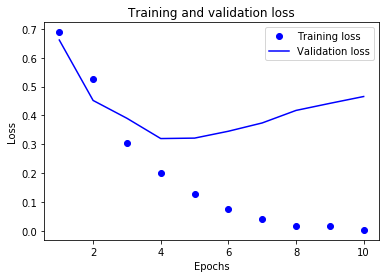

In [23]:
loss = history.history['loss']         # 훈련 손실
val_loss = history.history['val_loss'] # 검증 손실

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


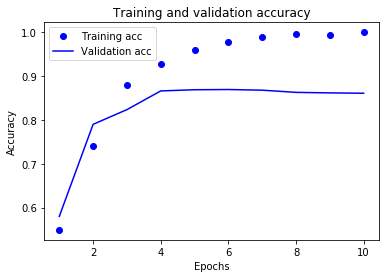

In [24]:
# 그래프 초기화
plt.clf()

acc = history.history['acc']           # 훈련 정확도
val_acc = history.history['val_acc']   # 검증 정확도

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [25]:
# 모델 저장
model.save('./model/movie_review_embedding_model.h5')

<br>
<br>

# 테스트셋 확인

In [26]:
# 저장된 모델 파일 로드
model = models.load_model('./model/movie_review_embedding_model.h5')

In [27]:
# 테스트셋 평가
results = model.evaluate(x_test, y_test)
results


25000/25000 [==============================] - 10s 415us/step


[0.4941669895863533, 0.85124]

예전 BoW로 하나의 벡터에 모든 문장 정보를 표시했을 때는 정확도가 87%였습니다. 이번에는 임베딩으로 각 단어를 별도로 구분하여 문장의 정보를 증가시켰는데, 오히려 정확도가 85%로 더 떨어졌습니다. 

그 이유는 최대 500개로 단어의 길이를 제한했기 때문입니다. BoW는 문장의 모든 단어를 사용하지만, 여기서는 문장의 앞부분만 가지고 예측을 합니다. 최대 시퀀스의 크기를 늘리면 더 좋은 결과가 나올 것이라 생각됩니다. 다만 그만큼 모델의 크기가 커지고 학습 시간이 오래 걸리게 됩니다.
<br>
<br>
<br>

In [28]:
# 테스트셋 예측
results = model.predict(x_test)
results


array([[0.01498046],
       [0.99998844],
       [0.43303293],
       ...,
       [0.00144234],
       [0.6770012 ],
       [0.91567177]], dtype=float32)

테스트셋을 예측하면 0~1사이의 값을 얻습니다. 보통 반올림을 하여 긍정/부정으로 구분합니다.
<br>
<br>
<br>

In [29]:
# 첫 번째 문서를 문장으로 변환
text = ' '.join([word_index_reverse.get(i - 3, '?') for i in test_data[0]])

print(text)
print('\n')
print('Real    :', y_test[0])
print('Predict :', results[0].round())


? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


Real    : 0.0
Predict : [0.]


테스트셋에 있는 첫 번째 문서의 예측 결과를 살펴보겠습니다. 실제값과 예측값 모두 '부정'으로 정확히 분류하였습니다.